## 1. Daum NEWS를 이용해 뉴스기사 100개 수집
- hint: 실습 3주차 API관련 파일 참고
- url: https://finance.daum.net/quotes/A105560#news/stock
- url: https://finance.daum.net/content/news?page=1&perPage=20&category=economy&searchType=all&keyword=A105560&pagination=true

In [2]:
import requests
import pprint
import json

In [3]:
url = "https://finance.daum.net/content/news?page=1&perPage=100&category=economy&searchType=all&keyword=A105560&pagination=true"
headers = {
    "referer": "https://finance.daum.net/quotes/A105560",
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
res = requests.get(url,headers=headers)
data = json.loads(res.text)['data']

In [4]:
from bs4 import BeautifulSoup 
contents = []
for news in data:
    url = "https://finance.daum.net/content/news/"+news['newsId']

    headers = {
        "referer": "https://finance.daum.net/quotes/A105560",
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
    }
    res = requests.get(url,headers=headers)
    soup = BeautifulSoup(json.loads(res.text)['content'], "html.parser")
    contents.append(soup.find('div',{'id': 'dmcfContents'}).text)
    

## 2. 텍스트 데이터 전처리 후 형태소 분석 후 명사 기준 TF-IDF계산

In [5]:
from konlpy.tag import Okt
okt = Okt()
stops_words = []
with open('data/stopword.txt', encoding="utf-8") as f:
    for line in f.readlines():
        stops_words.append(line.strip())

POS_LIST = ["Noun"]
tokenized_sentence_list = []
for content in contents:
    tokens = []
    for pos in okt.pos(content):
        #Q Condition 부분을 완성하시오
        condition = pos[1] in POS_LIST and pos[0] not in stops_words
        if condition:
            tokens.append(pos[0])
    tokenized_sentence_list.append(tokens)



/Users/seojungwon/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


## 3. 워드 클라우드 생성

In [6]:
noun_string = " ".join(tokenized_sentence_list[0])

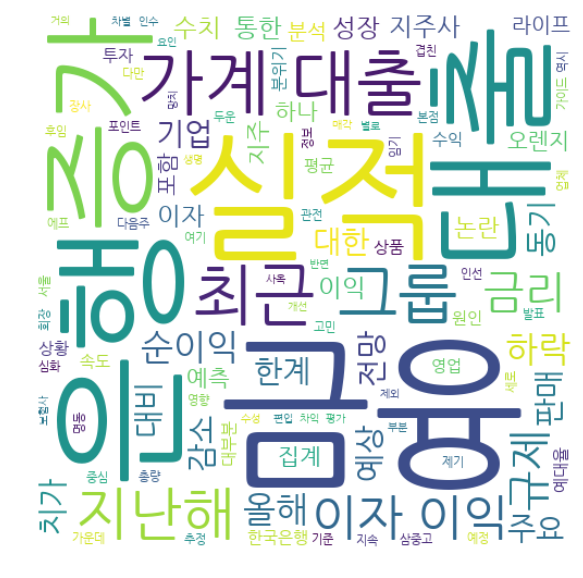

In [9]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="data/NanumGothic.ttf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()